In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/insurance.csv")
df2 = df
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


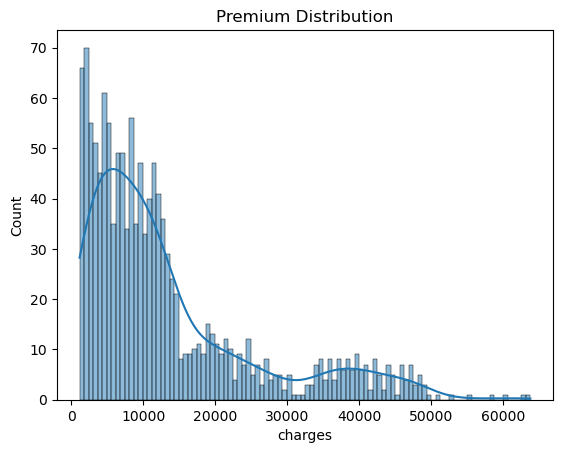

In [10]:
# Distribution of charge

sns.histplot(df2['charges'],kde= True , bins = 100)
plt.title('Premium Distribution')
plt.show()

Sex:
 sex
male      676
female    662
Name: count, dtype: int64 

Smoker:
 smoker
no     1064
yes     274
Name: count, dtype: int64 

Region:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



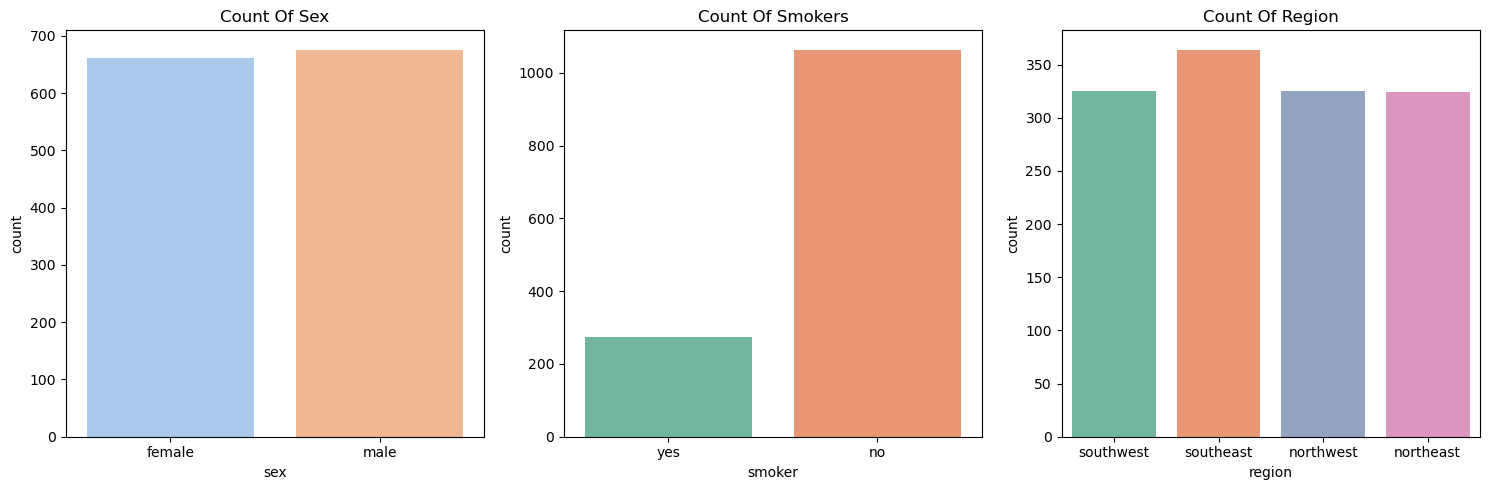

In [11]:
# value counts for categorical features

print('Sex:\n', df2['sex'].value_counts(), '\n')
print('Smoker:\n', df2['smoker'].value_counts(), '\n')
print('Region:\n', df2['region'].value_counts(), '\n')

# Count plots
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(data=df2 , x='sex', hue = 'sex' , palette='pastel')
plt.title('Count Of Sex')

plt.subplot(1,3,2)
sns.countplot(data=df2 , x = 'smoker',hue = 'smoker', palette = 'Set2')
plt.title('Count Of Smokers')

plt.subplot(1,3,3)
sns.countplot(data=df2 , x = 'region',hue = 'region', palette = 'Set2')
plt.title('Count Of Region')

plt.tight_layout()
plt.show()

value count for region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


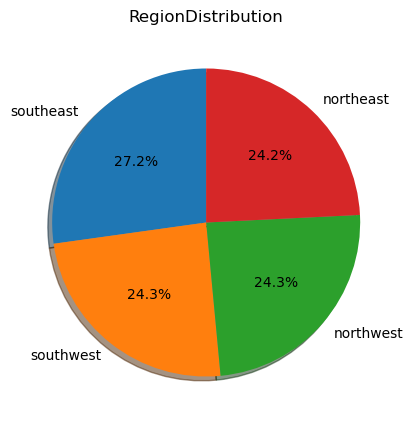

value count for smoker
smoker
no     1064
yes     274
Name: count, dtype: int64


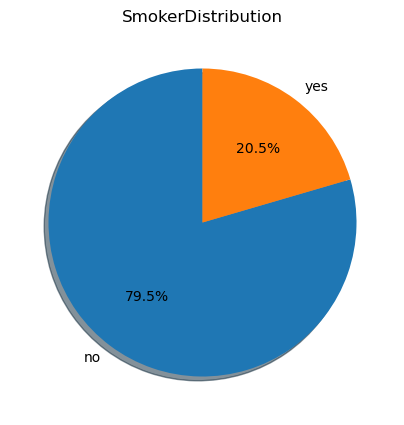

value count for sex
sex
male      676
female    662
Name: count, dtype: int64


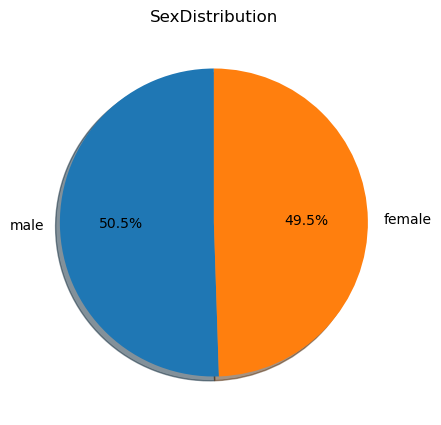

In [12]:
# value counts and pie chart for categorical features

catagorical_features = {'sex','smoker','region'}
for col in catagorical_features:
    print('value count for' ,col)
    print(df2[col].value_counts())

    # pie chart
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        figsize=(5,5)
    )
    plt.title(f'{col.capitalize()}Distribution')
    plt.ylabel('')
    plt.show()

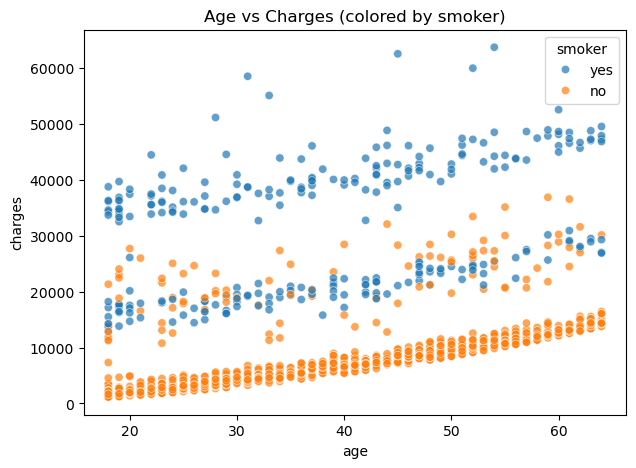

In [13]:
# Scatterplot : Age vs Charges

plt.figure(figsize=(7,5))
sns.scatterplot(data= df , x= 'age' , y = 'charges' , hue='smoker' ,alpha = 0.7 )
plt.title('Age vs Charges (colored by smoker)')
plt.show()

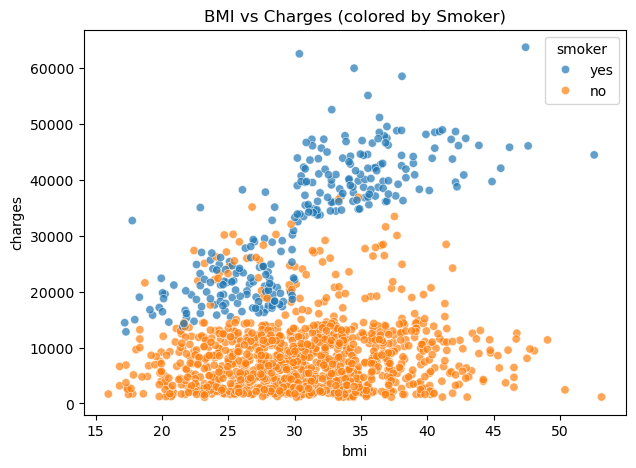

In [14]:
# Scatterplot: BMI vs Charges
# -------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.7)
plt.title("BMI vs Charges (colored by Smoker)")
plt.show()

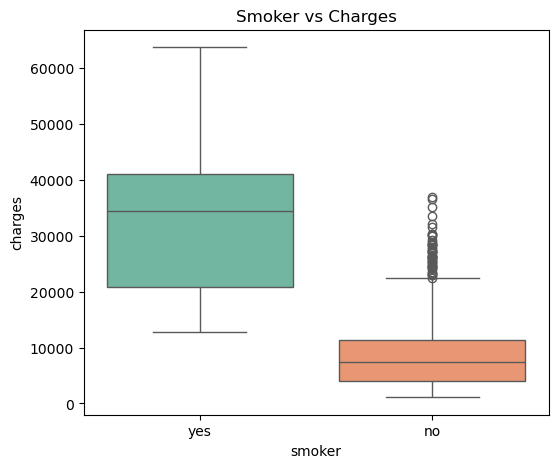

In [15]:
# Boxplot: Smoker vs Charges

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="smoker", y="charges",hue = 'smoker', palette="Set2")
plt.title("Smoker vs Charges")
plt.show()

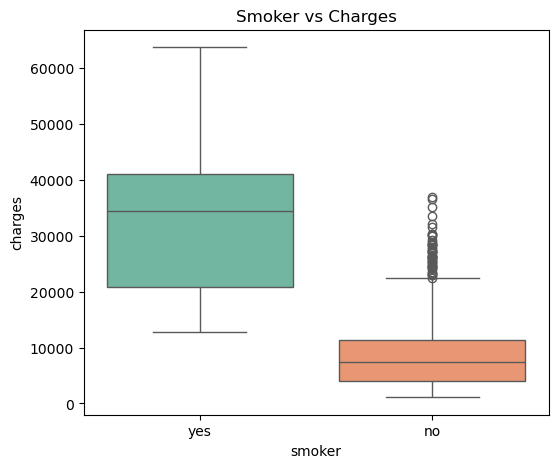

In [16]:
# Boxplot: Smoker vs Charges

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="smoker", y="charges",hue = 'smoker', palette="Set2")
plt.title("Smoker vs Charges")
plt.show()

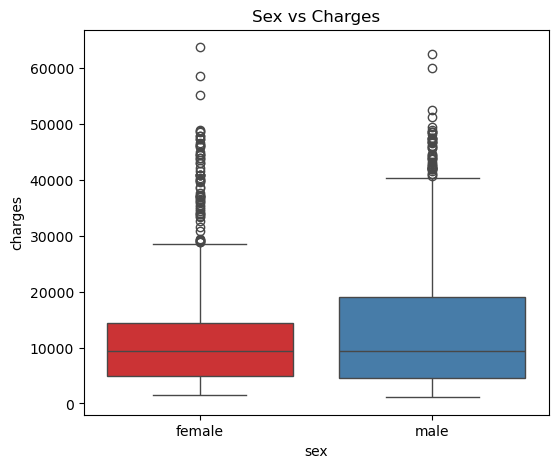

In [17]:
# Boxplot: Sex vs Charges

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="sex", y="charges",hue = 'sex', palette="Set1")
plt.title("Sex vs Charges")
plt.show()

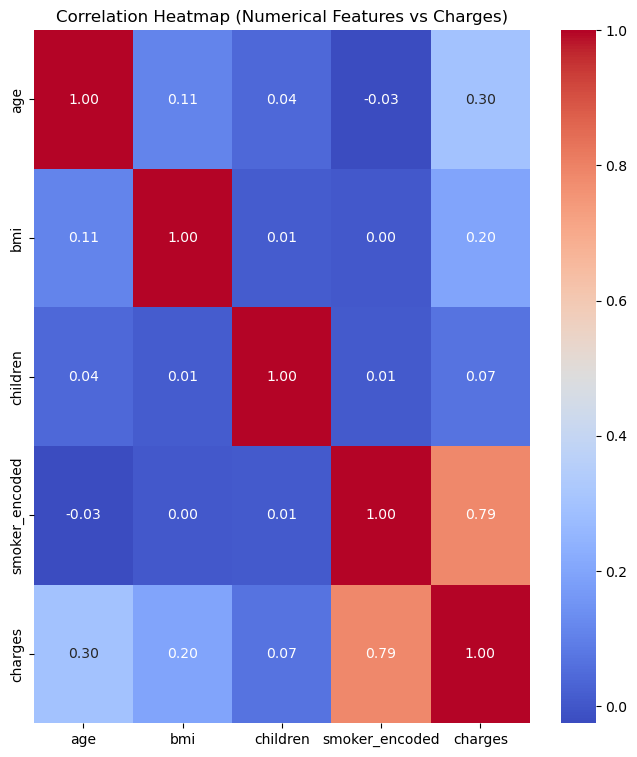

In [18]:
# Correlation Heatmap (Numerical Features vs Charges)

df2['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})
numerical_features = ["age", "bmi", "children",'smoker_encoded', "charges"]
corr = df[numerical_features].corr()

plt.figure(figsize=(8,9))
sns.heatmap(corr ,annot = True ,  cmap = 'coolwarm' , fmt = '.2f' )
plt.title("Correlation Heatmap (Numerical Features vs Charges)")
plt.show()

Insights Extraction


* Smokers clearly have higher charges.

* Higher BMI correlates with higher charges.

* Age increases charges gradually, but spikes for smokers.

* Region might not be as impactful as smoking.